## Exercise 1 - Question 2

In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [30]:
def show_img_plt(img, fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img, vmin=vmin, vmax=vmax)

def show_img_plt_cmap(img,cmap='gray', fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img,cmap, vmin=vmin, vmax=vmax)

In [31]:
img = cv2.imread('img/a.jpg', cv2.IMREAD_UNCHANGED)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## use canny with th_down 100 and th_up 150

In [32]:
canny = cv2.Canny(gray_img, 100, 150)

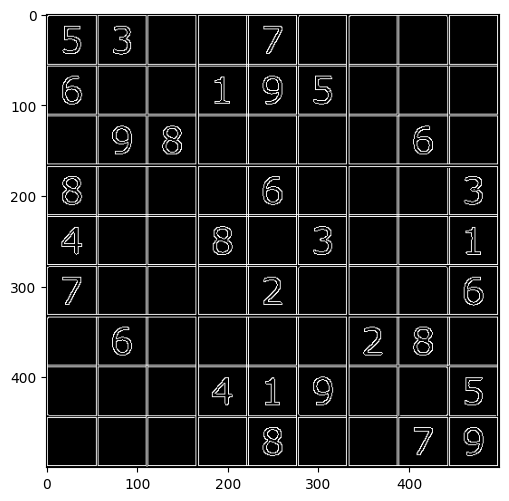

In [33]:
show_img_plt_cmap(canny)

## extract lines with threshold more than 200

In [34]:
lines = cv2.HoughLines(canny, 1, np.pi/180, 200)

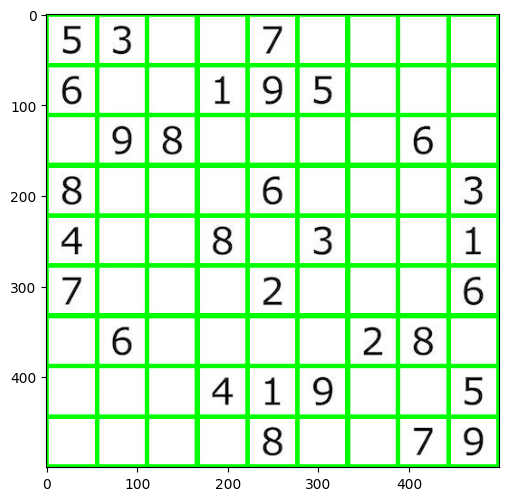

In [35]:
L = 500

for line in lines:
    rho, theta = line[0]
    
    a = np.cos(theta)
    b = np.sin(theta)
    
    
    y0 =  rho * b
    x0 = rho * a
    
    x1 = int (x0 + L*(b))
    y1 = int (y0 - L*(a))
    
    x2 = int(x0 - L*(b))
    y2 = int(y0 + L*(a))
    
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

show_img_plt(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))